`A Retail store is required to analyze the day-to-day transactions and keep a track of its customers 
spread across various locations along with their purchases/returns across various categories. 
Create a report and display the below calculated metrics, reports and inferences.`



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
customers=pd.read_csv('Customer.csv')

In [3]:
prod_hierarchy=pd.read_csv('prod_cat_info.csv')

In [4]:
transactions=pd.read_csv('Transactions.csv')

In [5]:
table1=pd.merge(customers,transactions,how='left',left_on='customer_Id',right_on='cust_id')

In [6]:
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [7]:
prod_hierarchy

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [8]:
customer_final=pd.merge(table1,prod_hierarchy,how='inner',left_on='prod_cat_code',right_on='prod_cat_code')

# 2. Prepare a summary report for the merged data set.

#### ` a. Get the column names and their corresponding data types`

In [9]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99293 non-null  int64  
 1   DOB                99293 non-null  object 
 2   Gender             99253 non-null  object 
 3   city_code          99257 non-null  float64
 4   transaction_id     99293 non-null  float64
 5   cust_id            99293 non-null  float64
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  float64
 8   prod_cat_code      99293 non-null  float64
 9   Qty                99293 non-null  float64
 10  Rate               99293 non-null  float64
 11  Tax                99293 non-null  float64
 12  total_amt          99293 non-null  float64
 13  Store_type         99293 non-null  object 
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  int64  
 16  prod_subcat        992

## b. Top/Bottom 10 observations

#### ` top 10 observations`

In [10]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,6,DIY
6,268159,08-01-1970,F,8.0,6.586740e+10,268159.0,31-03-2013,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,7,Fiction
7,268159,08-01-1970,F,8.0,6.586740e+10,268159.0,31-03-2013,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,12,Academic
8,268159,08-01-1970,F,8.0,6.586740e+10,268159.0,31-03-2013,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,6.586740e+10,268159.0,31-03-2013,11.0,5.0,5.0,214.0,112.350,1182.350,MBR,Books,11,Children


#### ` bottom 10 observations `

In [11]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,9.863111e+10,274618.0,19-04-2013,3.0,1.0,2.0,721.0,151.41,1593.41,e-Shop,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,7.128619e+10,268097.0,5/9/2011,4.0,1.0,5.0,818.0,429.45,4519.45,e-Shop,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,7.128619e+10,268097.0,5/9/2011,4.0,1.0,5.0,818.0,429.45,4519.45,e-Shop,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,7.128619e+10,268097.0,5/9/2011,4.0,1.0,5.0,818.0,429.45,4519.45,e-Shop,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,1.044085e+10,271772.0,26-04-2013,4.0,1.0,4.0,819.0,343.98,3619.98,Flagship store,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,1.044085e+10,271772.0,26-04-2013,4.0,1.0,4.0,819.0,343.98,3619.98,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,1.044085e+10,271772.0,26-04-2013,4.0,1.0,4.0,819.0,343.98,3619.98,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,9.413405e+10,269626.0,7/7/2011,3.0,1.0,3.0,1078.0,339.57,3573.57,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,9.413405e+10,269626.0,7/7/2011,3.0,1.0,3.0,1078.0,339.57,3573.57,MBR,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,9.413405e+10,269626.0,7/7/2011,3.0,1.0,3.0,1078.0,339.57,3573.57,MBR,Clothing,3,Kids


#### ` c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) `

In [12]:
customer_numbers=customer_final.loc[:,['Qty','Rate', 'Tax','total_amt']]

In [13]:
customer_numbers.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,99293.0,2.438017,2.260726,-5.000,1.00,3.00,4.000,5.0
Rate,99293.0,637.919884,621.576326,-1499.000,313.00,713.00,1109.000,1500.0
Tax,99293.0,248.873736,187.014422,7.350,98.28,199.92,366.975,787.5
total_amt,99293.0,2114.616420,2502.306768,-8270.925,762.45,1761.37,3585.725,8287.5


In [14]:
customer_final.select_dtypes('object').head()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,13-01-2014,TeleShop,Books,Fiction
1,02-01-1970,M,13-01-2014,TeleShop,Books,Academic
2,02-01-1970,M,13-01-2014,TeleShop,Books,Non-Fiction
3,02-01-1970,M,13-01-2014,TeleShop,Books,Children
4,02-01-1970,M,13-01-2014,TeleShop,Books,Comics


In [15]:
customer_object=customer_final.loc[:,['Store_type','prod_cat','prod_subcat']]

frequency bar for  {'Store_type'}


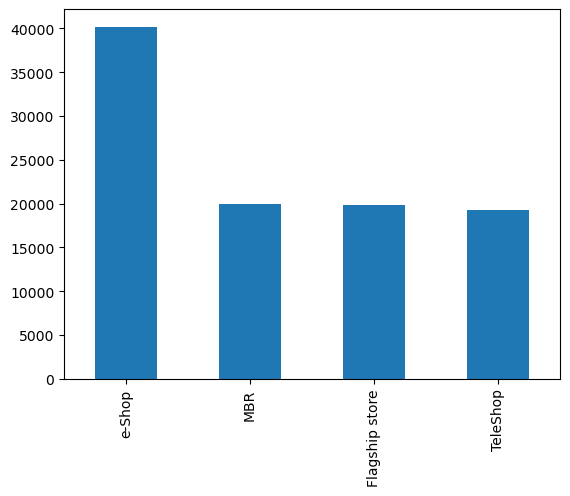

frequency bar for  {'prod_cat'}


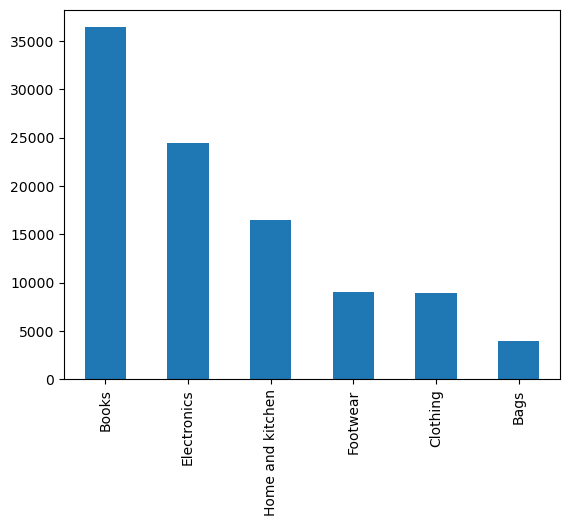

frequency bar for  {'prod_subcat'}


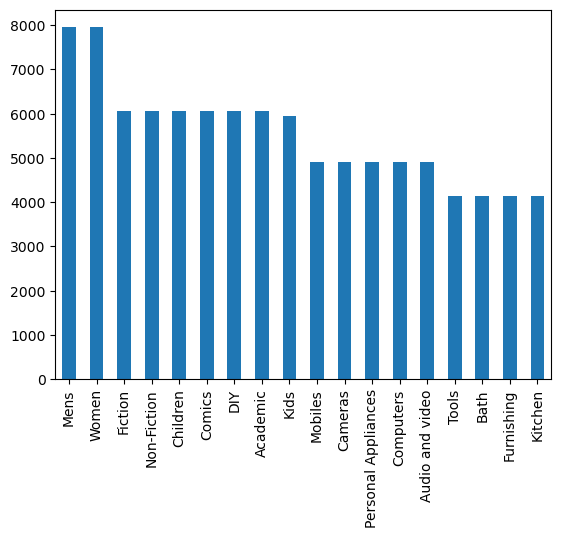

In [16]:
 for i in customer_object.columns:
        print(f'frequency bar for ',{i})
        customer_object[i].value_counts().plot(kind='bar')
        plt.show()
        
        
       


In [17]:
customer_final['DOB']=pd.to_datetime(customer_final.DOB,format='%d-%m-%Y')

In [18]:
customer_final['tran_date']=customer_final.tran_date.str.replace('/','-')

In [19]:
customer_final['tran_date']=pd.to_datetime(customer_final.tran_date,format='%d-%m-%Y')

In [20]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        99293 non-null  int64         
 1   DOB                99293 non-null  datetime64[ns]
 2   Gender             99253 non-null  object        
 3   city_code          99257 non-null  float64       
 4   transaction_id     99293 non-null  float64       
 5   cust_id            99293 non-null  float64       
 6   tran_date          99293 non-null  datetime64[ns]
 7   prod_subcat_code   99293 non-null  float64       
 8   prod_cat_code      99293 non-null  float64       
 9   Qty                99293 non-null  float64       
 10  Rate               99293 non-null  float64       
 11  Tax                99293 non-null  float64       
 12  total_amt          99293 non-null  float64       
 13  Store_type         99293 non-null  object        
 14  prod_c

#### `3. Generate histograms for all continuous variables and frequency bars for categorical variables.`

frequency bar for categorical variables  {'Gender'}


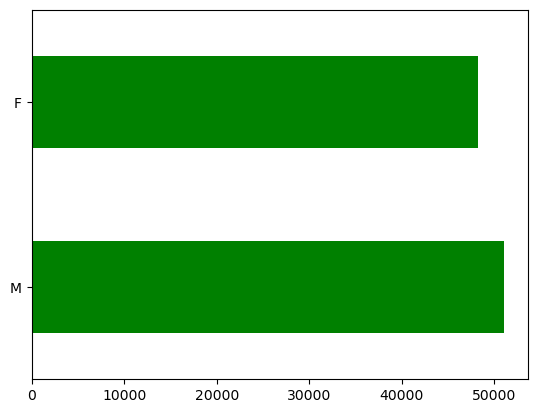

frequency bar for categorical variables  {'city_code'}


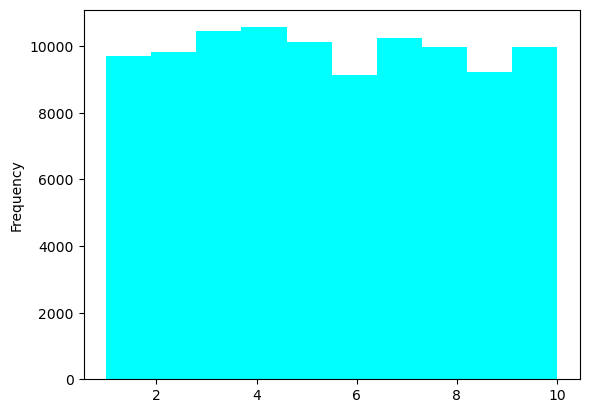

frequency bar for categorical variables  {'transaction_id'}


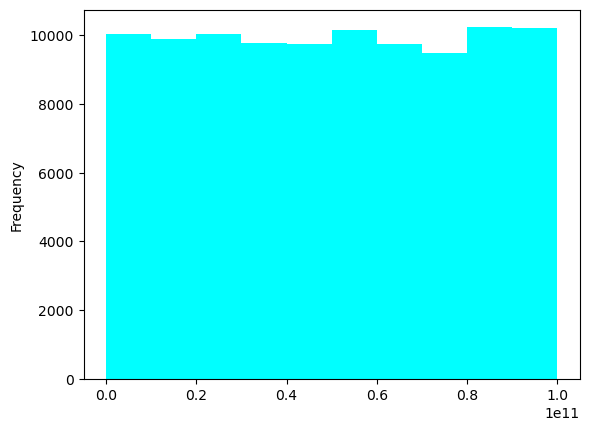

frequency bar for categorical variables  {'cust_id'}


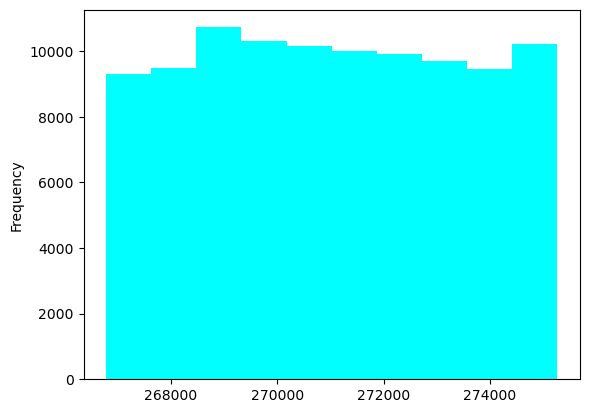

frequency bar for categorical variables  {'prod_subcat_code'}


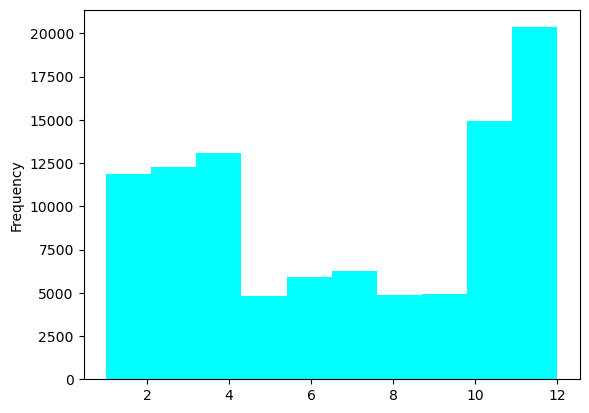

frequency bar for categorical variables  {'prod_cat_code'}


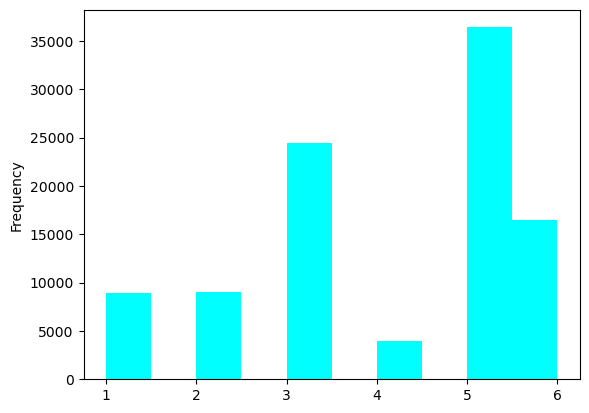

frequency bar for categorical variables  {'Qty'}


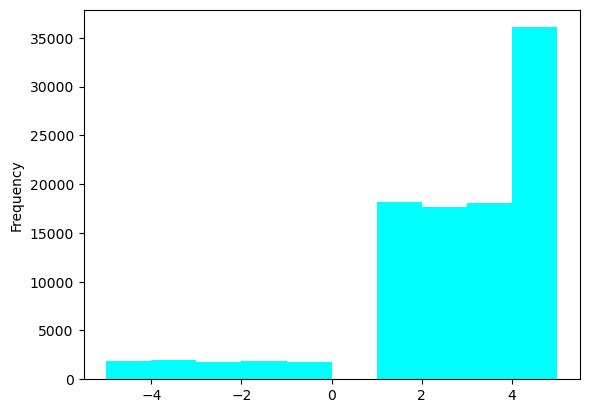

frequency bar for categorical variables  {'Rate'}


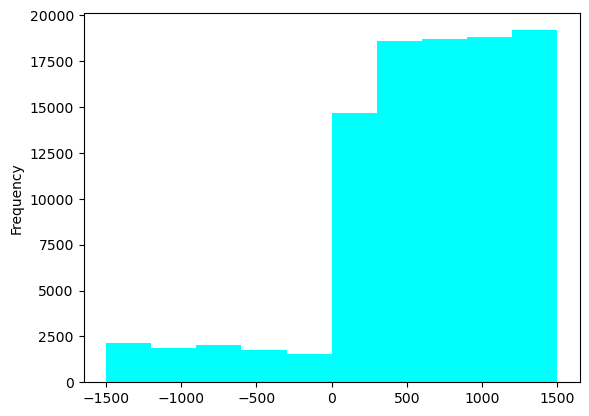

frequency bar for categorical variables  {'Tax'}


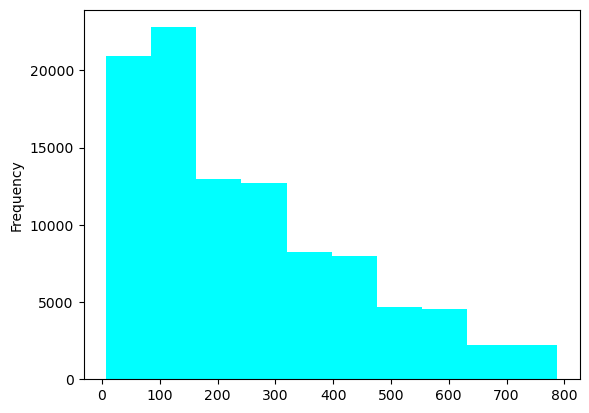

frequency bar for categorical variables  {'total_amt'}


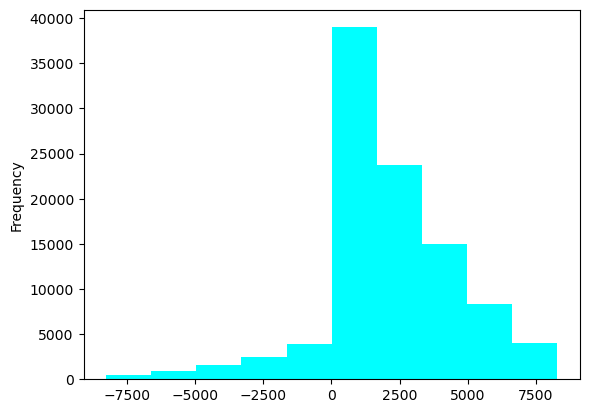

frequency bar for categorical variables  {'Store_type'}


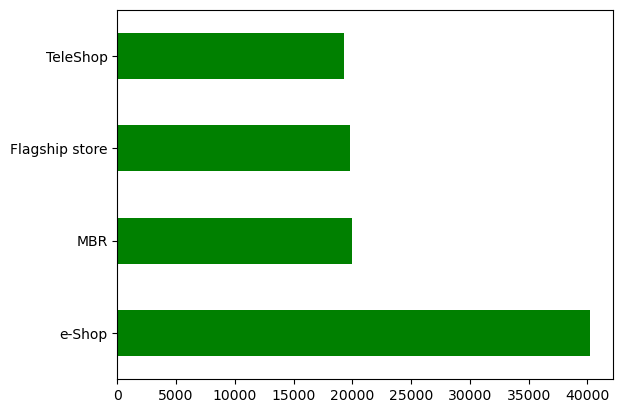

frequency bar for categorical variables  {'prod_cat'}


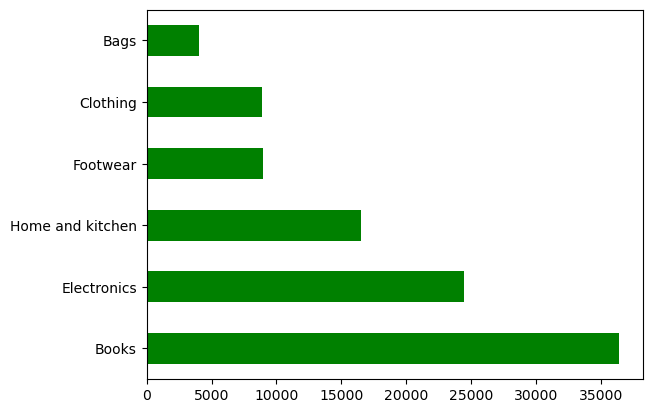

frequency bar for categorical variables  {'prod_subcat'}


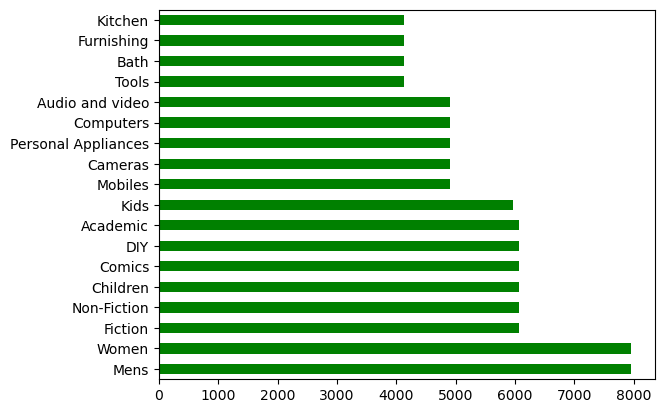

In [21]:
for i in customer_final.columns:
    if customer_final[i].dtype=='O':
        print(f'frequency bar for categorical variables ',{i})
        customer_final[i].value_counts().plot(kind='barh',color='green')
        plt.show()
        
    elif customer_final[i].dtype=='float64':
        print(f'frequency bar for categorical variables ',{i})
        customer_final[i].plot(kind='hist',color='Aqua')
        plt.show()

# `4. Calculate the following information using the merged dataset :`


### ` a. Time period of the available transaction data`


In [22]:
tran_date_starting=customer_final.tran_date.min()

In [23]:
tran_date_end=customer_final.tran_date.max()

In [24]:
time_period=tran_date_end-tran_date_starting

In [25]:
print(f'Time period of the available transaction data',round(time_period.days/365.25,0),'years')

Time period of the available transaction data 3.0 years


#### `b. Count of transactions where the total amount of transaction was negative`

In [26]:
customer_final[customer_final.total_amt<0]['transaction_id'].count()

9294

## 5. Analyze which product categories are more popular among females vs male customers.


In [27]:
pd.crosstab(index=customer_final.prod_cat,columns=customer_final.Gender,values=customer_final.Qty,aggfunc='sum')

Gender,F,M
prod_cat,,
Bags,4724.0,4692.0
Books,42420.0,45522.0
Clothing,10275.0,11244.0
Electronics,29160.0,32380.0
Footwear,11148.0,10665.0
Home and kitchen,19580.0,20164.0


#### `6. Which City code has the maximum customers and what was the percentage of customers from that city?`


In [28]:
print(round((customer_final.city_code.value_counts().max())*100/customer_final.city_code.value_counts().sum(),3),'%')

10.65 %


#### ` 7. Which store type sells the maximum products by value and by quantity`

In [29]:
customer_final.groupby('Store_type')[['total_amt','Qty']].sum().sort_values(by=['total_amt','Qty'],ascending=False)

,total_amt,Qty
Store_type,,
e-Shop,8.591575e+07,98447.0
Flagship store,4.188397e+07,48007.0
MBR,4.170033e+07,48285.0
TeleShop,4.046656e+07,47339.0


#### `8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?`


In [30]:
customer_final[(customer_final.Store_type=='Flagship store')&(customer_final.prod_cat=="Electronics")|(customer_final.prod_cat=="Clothing")]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
65953,270181,1970-01-10,F,2.0,4.726090e+10,270181.0,2011-03-18,8.0,3.0,1.0,1012.0,106.26,1118.26,Flagship store,Electronics,4,Mobiles
65954,270181,1970-01-10,F,2.0,4.726090e+10,270181.0,2011-03-18,8.0,3.0,1.0,1012.0,106.26,1118.26,Flagship store,Electronics,5,Computers
65955,270181,1970-01-10,F,2.0,4.726090e+10,270181.0,2011-03-18,8.0,3.0,1.0,1012.0,106.26,1118.26,Flagship store,Electronics,8,Personal Appliances
65956,270181,1970-01-10,F,2.0,4.726090e+10,270181.0,2011-03-18,8.0,3.0,1.0,1012.0,106.26,1118.26,Flagship store,Electronics,9,Cameras
65957,270181,1970-01-10,F,2.0,4.726090e+10,270181.0,2011-03-18,8.0,3.0,1.0,1012.0,106.26,1118.26,Flagship store,Electronics,10,Audio and video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,1992-12-17,M,2.0,1.044085e+10,271772.0,2013-04-26,4.0,1.0,4.0,819.0,343.98,3619.98,Flagship store,Clothing,1,Women
99289,271772,1992-12-17,M,2.0,1.044085e+10,271772.0,2013-04-26,4.0,1.0,4.0,819.0,343.98,3619.98,Flagship store,Clothing,3,Kids
99290,269626,1992-12-27,F,5.0,9.413405e+10,269626.0,2011-07-07,3.0,1.0,3.0,1078.0,339.57,3573.57,MBR,Clothing,4,Mens
99291,269626,1992-12-27,F,5.0,9.413405e+10,269626.0,2011-07-07,3.0,1.0,3.0,1078.0,339.57,3573.57,MBR,Clothing,1,Women


In [31]:
customer_final.Store_type

0              TeleShop
1              TeleShop
2              TeleShop
3              TeleShop
4              TeleShop
              ...      
99288    Flagship store
99289    Flagship store
99290               MBR
99291               MBR
99292               MBR
Name: Store_type, Length: 99293, dtype: object

#### `9 . What was the total amount earned from "Male" customers under the "Electronics" category?`

In [32]:
customer_final[(customer_final.prod_cat=='Electronics')&(customer_final.Gender=='M') ]['total_amt'].sum()

28515547.125

#### `10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?`

In [33]:
cust_positive_amt=customer_final[customer_final.total_amt>0]

In [34]:
cust_positive_amt.groupby()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,11,Children
4,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,1992-12-17,M,2.0,1.044085e+10,271772.0,2013-04-26,4.0,1.0,4.0,819.0,343.980,3619.980,Flagship store,Clothing,1,Women
99289,271772,1992-12-17,M,2.0,1.044085e+10,271772.0,2013-04-26,4.0,1.0,4.0,819.0,343.980,3619.980,Flagship store,Clothing,3,Kids
99290,269626,1992-12-27,F,5.0,9.413405e+10,269626.0,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,4,Mens
99291,269626,1992-12-27,F,5.0,9.413405e+10,269626.0,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,1,Women


# `11. For all customers aged between 25 - 35, find out`

In [35]:
today=pd.Timestamp.today()

In [36]:
diff=today-customer_final.DOB

In [37]:
customer_25_to_35=customer_final[(diff.dt.days/365.25>25)&(diff.dt.days/365.25<35)]

#### `a. What was the total amount spent for “Electronics” and “Books” product categories`

In [38]:
customer_25_to_35[(customer_25_to_35.prod_cat=='Books')|(customer_25_to_35.prod_cat=='Electronics')]['total_amt'].sum()

25333395.75

#### `b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?`

In [37]:
customer_25_to_35[customer_25_to_35.tran_date.between('2014-01-1','2014-03-01')]['total_amt'].sum()

2218487.505